**Compare results**

Compare the results between OpenAI and the libraries used

**Setup**

In [ ]:
!pip install pandas

In [ ]:
!pip install matplotlib

**Statistics by sentiments**

In [3]:
import pandas as pd

pysentimientos_file_path = './output/versosalpaso_robertuito-sentiment-analysis.csv'
pysentimientos = pd.read_csv(pysentimientos_file_path, sep=";", encoding='utf-8')
pysentimientos.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'id', 'latitud', 'longitud', 'autor',
       'barrio', 'verso', 'direccion', 'openai_sentiment', 'quarter',
       'district', 'city', 'robertuito_sentiment',
       'robertuito_sentiment_probas'],
      dtype='object')

In [4]:
df = pysentimientos.rename(columns = { 'openai_sentiment': 'sentiment' })
s = df.groupby(['sentiment'])['sentiment'].count()

compare_results = pd.DataFrame(s).rename(columns = { 'sentiment': 'openai_sentiment' })

In [5]:
s = pysentimientos.groupby(['robertuito_sentiment'])['robertuito_sentiment'].count()
compare_results['robertuito_sentiment'] = s
compare_results

,openai_sentiment,robertuito_sentiment
sentiment,,
negative,18,277
neutral,56,637
positive,1026,186


In [6]:
twitter_xlm__file_path = './output/versosalpaso_twitter-XLM-roBERTa-base.csv'
twitter_xlm = pd.read_csv(twitter_xlm__file_path, sep=";", encoding='utf-8')
twitter_xlm.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'id', 'latitud', 'longitud', 'autor',
       'barrio', 'verso', 'direccion', 'openai_sentiment', 'quarter',
       'district', 'city', 'twitter-xml_sentiment', 'twitter-xml_anger',
       'twitter-xml_disgust', 'twitter-xml_fear', 'twitter-xml_joy',
       'twitter-xml_sadness', 'twitter-xml_surprise', 'twitter-xml_others',
       'twitter-xml_as_positive', 'twitter-xml_as_neutral',
       'twitter-xml_as_negative'],
      dtype='object')

In [7]:
s = twitter_xlm.groupby(['twitter-xml_sentiment'])['twitter-xml_sentiment'].count()
compare_results['twitter-xml_sentiment'] = s
compare_results

,openai_sentiment,robertuito_sentiment,twitter-xml_sentiment
sentiment,,,
negative,18,277,235
neutral,56,637,780
positive,1026,186,85


In [8]:
compare_results_transpose = compare_results.transpose()
compare_results_transpose

sentiment,negative,neutral,positive
openai_sentiment,18,56,1026
robertuito_sentiment,277,637,186
twitter-xml_sentiment,235,780,85


In [9]:
colors = {'negative': '#D23C69', 'neutral': '#FFC850', 'positive': '#64DCA0'}

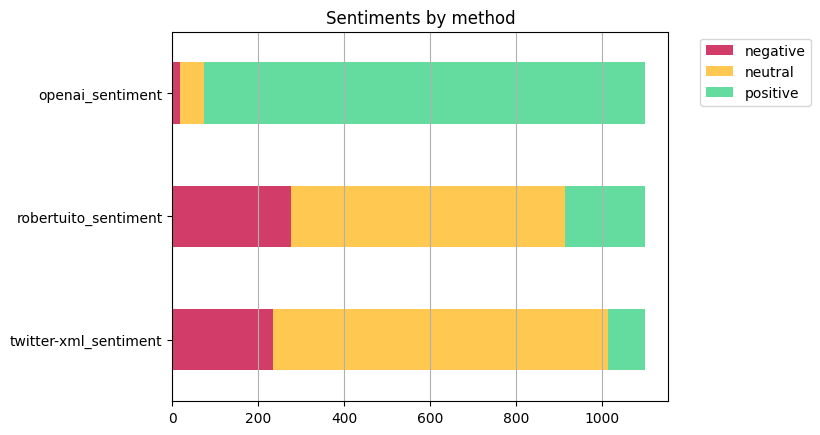

In [10]:
import matplotlib.pyplot as plt

ax = compare_results_transpose.plot.barh(color=colors, title='Sentiments by method', grid=True, stacked=True)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
ax.invert_yaxis()
ax.grid(axis='y')

**Statistics by district**

In [12]:
districts = pysentimientos['district'].unique()
sentiments = pysentimientos['openai_sentiment'].unique()
method_used = compare_results.columns.values

In [14]:
index = pd.MultiIndex.from_product([districts, method_used], names=['district', 'method'])
compare_districts = pd.DataFrame(index=index, columns=sentiments).fillna(0)
compare_districts[0:3]

positive  negative  neutral
district method                                            
Centro   openai_sentiment              0         0        0
         robertuito_sentiment          0         0        0
         twitter-xml_sentiment         0         0        0

In [15]:
def add_stats(data: pd.DataFrame, sentiment_colname: str):
    s = data.groupby(['district', sentiment_colname])[sentiment_colname].count()

    for key, value in s.items():
        district = key[0]
        sentiment = key[1]
        compare_districts.loc[(district, sentiment_colname), sentiment] = value


In [16]:
add_stats(pysentimientos, 'openai_sentiment')
add_stats(pysentimientos, 'robertuito_sentiment')
add_stats(twitter_xlm, 'twitter-xml_sentiment')

compare_districts[0:3]

positive  negative  neutral
district method                                            
Centro   openai_sentiment             67         1        2
         robertuito_sentiment         16        16       38
         twitter-xml_sentiment         7        13       50

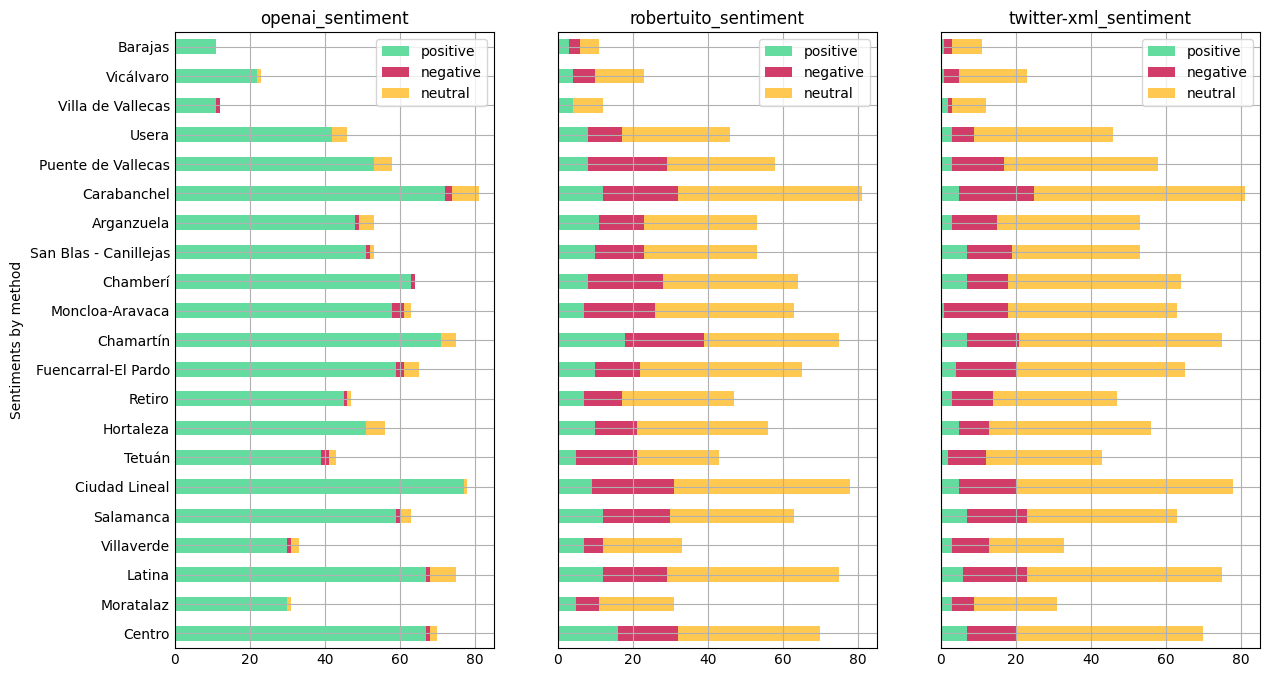

In [17]:
import matplotlib.pyplot as plt

compare_districts_flatten = compare_districts.reset_index()
compare_by_method = compare_districts_flatten.groupby('method')

fig, axes = plt.subplots(1, len(compare_by_method), sharey=True, figsize=(14,8))

for ax, (method, group) in zip(axes, compare_by_method):
    group.set_index('district').rename_axis(method)[['positive', 'negative', 'neutral']]. \
        plot.barh(ax=ax, color=colors, title=method, ylabel='Sentiments by method', grid=True, stacked=True)
    ax.tick_params(axis='both', which='both', length=0)